The code for an FIR filter. The input signal has frequency components of 10Hz, 20Hz and 50Hz. The FIR filter has been designed for a cutoff frequency of 40Hz. The filter can be used both as a High Pass and Low Pass filter.

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, ifft, fftshift
from scipy.signal import hamming, firwin, freqz

Generating Signal

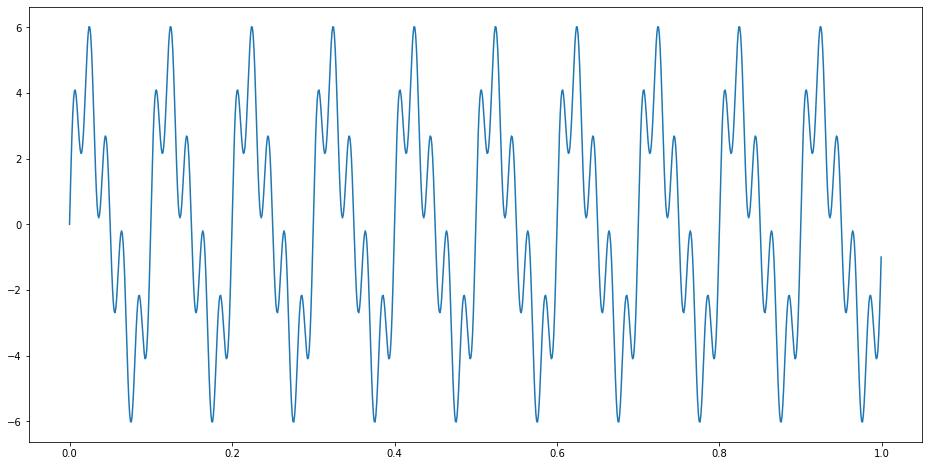

In [2]:
fs = 1000
plt.figure(figsize=(16,8))
t = np.arange(0,1,1/fs)
x = 4*np.sin(2*np.pi*10*t)+np.sin(2*np.pi*20*t)+2*np.sin(2*np.pi*50*t)
plt.plot(t,x)
plt.show()

Finding DFT

(-60.0, 60.0)

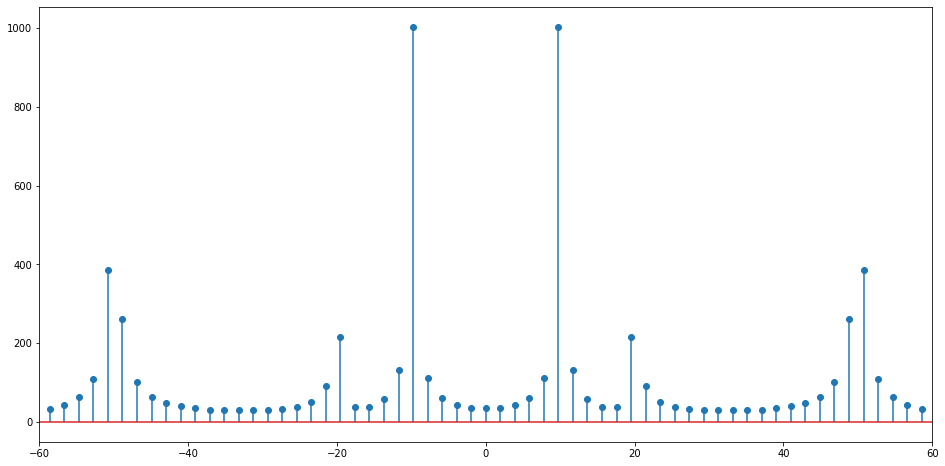

In [3]:
N = 2**9
X = fft(x,N)
df = fs/N
X1 = fftshift(X)
sampleindex = np.arange(start=-N//2,stop=N//2)
f1 =sampleindex * df
plt.figure(figsize=(16,8))
plt.stem(f1, abs(X1))
plt.xlim(-60,60)

Designing Filter

In [4]:
O = 101
fc = 40
taps = firwin(O, fc/fs, window=('hamming'), pass_zero = True)

Finding the Filtered Signal using Convolution

(-60.0, 60.0)

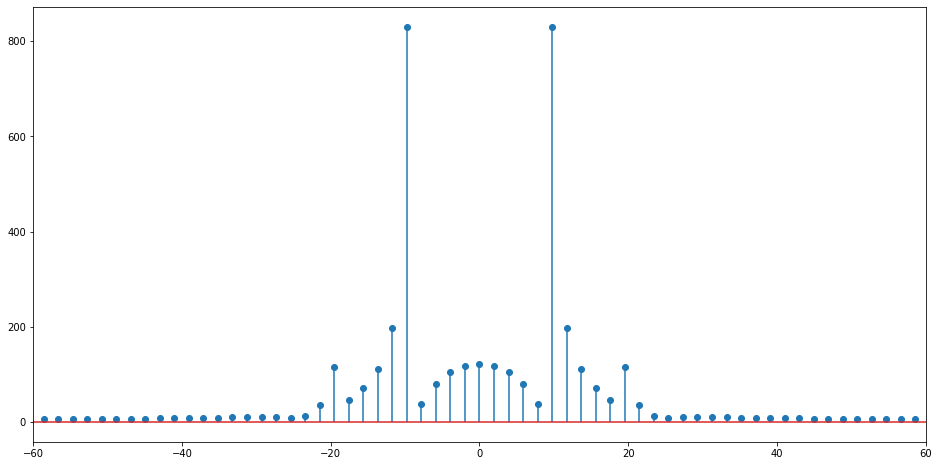

In [5]:
y = np.convolve(x,taps)
N = 2**9
Y = fft(y,N)
df = fs/N
Y1 = fftshift(Y)
sampleindex = np.arange(start=-N//2,stop=N//2)
f1 =sampleindex * df
plt.figure(figsize=(16,8))
plt.stem(f1, abs(Y1))
plt.xlim(-60,60)